# Outlier Detection

Outlier Detection salah satu proses dalam Understanding data untuk mengidentifikasi data atau observasi yang secara signifikan berbeda dari sebagian besar data dalam suatu dataset. Data ini disebut outlier atau anomali, dan sering kali merepresentasikan pola yang tidak biasa, kesalahan, atau kejadian langka yang penting untuk dianalisis. Tujuan Outlier Detection diantaranya adalah.

## Meningkatkan Kualitas Data
Membersihkan Data: Outlier sering muncul karena kesalahan input, noise, atau kesalahan teknis (misalnya, sensor rusak). Deteksi outlier membantu menghapus atau memperbaiki data yang tidak valid.

Memastikan Konsistensi: Menghilangkan gangguan dari data "kotor" sehingga analisis lebih akurat dan hasilnya lebih andal.

## Memastikan Akurasi Analisis Statistik dan Model
Mengurangi Bias: Outlier dapat memengaruhi nilai statistik seperti mean dan standar deviasi. Contoh: Satu data gaji miliaran dalam dataset karyawan akan membuat rata-rata gaji tidak realistis.

Meningkatkan Kinerja Model ML: Model machine learning (seperti regresi atau klasifikasi) bisa menjadi tidak stabil jika dilatih dengan data yang mengandung outlier.

## Mendeteksi Kejadian Langka atau Anomali
Identifikasi Fenomena Unik: Contoh:Transaksi penipuan di perbankan yang nilainya tidak biasa. Hasil medis abnormal (misalnya, kadar gula darah ekstrem).
Serangan siber (aktivitas jaringan yang tidak wajar).

Peringatan Dini: Outlier bisa menjadi sinyal untuk potensi risiko atau peluang, seperti kegagalan mesin di industri.

## Meningkatkan Keamanan dan Deteksi Ancaman
Deteksi Intrusi: Pada sistem keamanan TI, outlier bisa merepresentasikan upaya peretasan atau aktivitas mencurigakan.

Pencegahan Fraud: Memantau pola transaksi yang tidak biasa untuk mencegah penipuan.

## Optimasi Proses Bisnis dan Operasional
Quality Control: Di industri manufaktur, outlier bisa menunjukkan produk cacat atau kesalahan produksi.

Efisiensi Sumber Daya: Contoh: Analisis konsumsi energi yang tidak wajar untuk mengoptimalkan penggunaan listrik.

## Mendukung Pengambilan Keputusan Berbasis Data
Insight yang Relevan: Memisahkan "sinyal" (informasi penting) dari "noise" (data tidak relevan) agar keputusan bisnis atau strategis lebih tepat.

Analisis Tren: Memastikan tren yang teridentifikasi tidak terdistorsi oleh data ekstrem.

## Validasi Asumsi Data
Uji Distribusi Data: Outlier bisa mengindikasikan pelanggaran asumsi statistik (misalnya, data tidak berdistribusi normal).

Eksplorasi Data: Memahami batasan dataset dan apakah outlier perlu dipertahankan atau dihapus.

Setelah kita mengetahui tujuan dari outlier detection kita bisa melakukan tahapan berikiut untuk mengetahui outlier detection dari data Iris.

## Tahapan mendeteksi outlier

### Pemahaman data

Pada tahap awal untuk mengetahui nilai outlier pada suatu data terlebih dahulu kita harus memahami data tersebut, termasuk jumlah fitur, tipe data, distribusi, dan hubungan antar variabel. Identifikasi apakah dataset memiliki anomali alami atau error dalam pencatatan.


In [2]:

!pip install pymysql
!pip install pandas tabulate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.1 MB/s eta 0:00:00


In [3]:
import psycopg2
import pymysql
import pandas as pd
from tabulate import tabulate

# Koneksi ke database PostgreSQL
PG_HOST = "pg-2e640ec9-rahmatullayli123-d892.h.aivencloud.com"
PG_PORT = "21028"
PG_NAME = "defaultdb"
PG_USER = "avnadmin"
PG_PASS = "AVNS_93PD-YH-4mlx5toeFU3"

# Konfigurasi koneksi ke database MySQL
DB_HOST = "mysql-309c3d6e-mysqlirispendata7.h.aivencloud.com"
DB_PORT = 26958
DB_NAME = "iris_mysql"
DB_USER = "avnadmin"
DB_PASS = "AVNS_krNRWz9TOsAjruawhm3"

try:
    # Koneksi PostgreSQL
    conn = psycopg2.connect(
        host=PG_HOST, port=PG_PORT, dbname=PG_NAME,
        user=PG_USER, password=PG_PASS, sslmode="require"
    )
    cur = conn.cursor()

    # Ambil data dari PostgreSQL (ID, Class, Sepal Length, Sepal Width)
    cur.execute("SELECT * FROM sepal;")  # Sesuaikan tabel
    pg_rows = cur.fetchall()
    pg_columns = [desc[0] for desc in cur.description]
    pg_df = pd.DataFrame(pg_rows, columns=pg_columns)

    # Koneksi MySQL
    mysql_conn = pymysql.connect(
        host=DB_HOST, port=DB_PORT, user=DB_USER,
        password=DB_PASS, database=DB_NAME,
        cursorclass=pymysql.cursors.DictCursor
    )
    mysql_cur = mysql_conn.cursor()

    # Ambil data dari MySQL (ID, Petal Length, Petal Width)
    mysql_cur.execute("SELECT * FROM petal;")  # Sesuaikan tabel
    mysql_rows = mysql_cur.fetchall()
    mysql_df = pd.DataFrame(mysql_rows)

    # Menggabungkan kedua tabel berdasarkan ID
    combined_df = pd.merge(pg_df, mysql_df, on=["id","class"], how="inner")  # Inner join

    # Mengatur urutan kolom agar class berada di sebelah ID
    ordered_columns = ["id", "class", "sepal_length", "sepal_width", "petal_length", "petal_width"]
    combined_df = combined_df[ordered_columns]

    # Mengurutkan data berdasarkan ID
    combined_df = combined_df.sort_values(by="id").reset_index(drop=True)

    # Menampilkan 3 data awal, tanda "..." di tengah, dan 3 data akhir
    df_selected = pd.concat([
        combined_df.head(30),
        pd.DataFrame([["..."] * len(combined_df.columns)], columns=combined_df.columns),
        combined_df.tail(30)
    ])
    # Menampilkan hasil dalam format tabel
    print(tabulate(df_selected, headers="keys", tablefmt="psql", showindex=False))

except Exception as e:
    print("Error:", e)

finally:
    # Menutup koneksi
    if cur:
        cur.close()
    if conn:
        conn.close()

+------+----------------+----------------+---------------+----------------+---------------+
| id   | class          | sepal_length   | sepal_width   | petal_length   | petal_width   |
|------+----------------+----------------+---------------+----------------+---------------|
| 1    | Iris-setosa    | 20.1           | 30.5          | 80.4           | 70.0          |
| 2    | Iris-setosa    | 4.9            | 3.0           | 1.4            | 0.2           |
| 3    | Iris-setosa    | 4.7            | 3.2           | 1.3            | 0.2           |
| 4    | Iris-setosa    | 4.6            | 3.1           | 1.5            | 0.2           |
| 5    | Iris-setosa    | 5.0            | 3.6           | 1.4            | 0.2           |
| 6    | Iris-setosa    | 5.4            | 3.9           | 1.7            | 0.4           |
| 7    | Iris-setosa    | 4.6            | 3.4           | 1.4            | 0.3           |
| 8    | Iris-setosa    | 5.0            | 3.4           | 1.5            | 0.2 

### Eksplorasi Data

Eksplorasi data (EDA) adalah proses memahami karakteristik dataset sebelum melakukan pemodelan lebih lanjut. Dalam EDA, kita melakukan descriptive statistics dan visualisasi data untuk menemukan pola, outlier, dan hubungan antar variabel.
#### Visualisasi Data:

Boxplot → Menampilkan distribusi data & potensi outlier.

Histogram → Melihat distribusi data.

Scatter Plot → Mengidentifikasi pola hubungan antar variabel.

####Descriptive Statistics:
Mean, median, standar deviasi, skewness, dan kurtosis.




=== Descriptive Statistics ===
               id  sepal_length  sepal_width  petal_length  petal_width
count  150.000000    150.000000   150.000000    150.000000    150.00000
mean    75.500000      5.943333     3.234000      4.285333      1.66400
std     43.445368      1.426895     2.282464      6.497593      5.66807
min      1.000000      4.300000     2.000000      1.000000      0.10000
25%     38.250000      5.100000     2.800000      1.600000      0.30000
50%     75.500000      5.800000     3.000000      4.400000      1.30000
75%    112.750000      6.400000     3.300000      5.100000      1.80000
max    150.000000     20.100000    30.500000     80.400000     70.00000


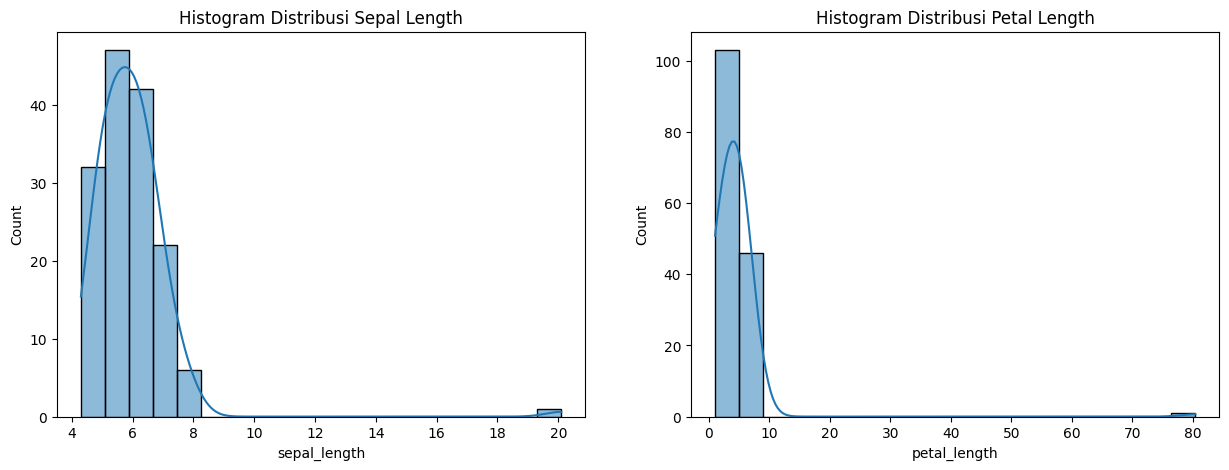

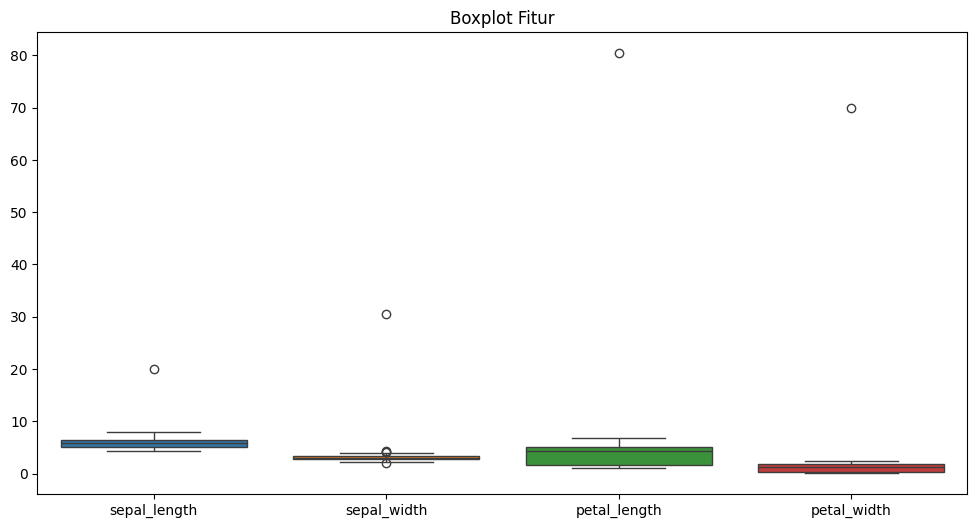

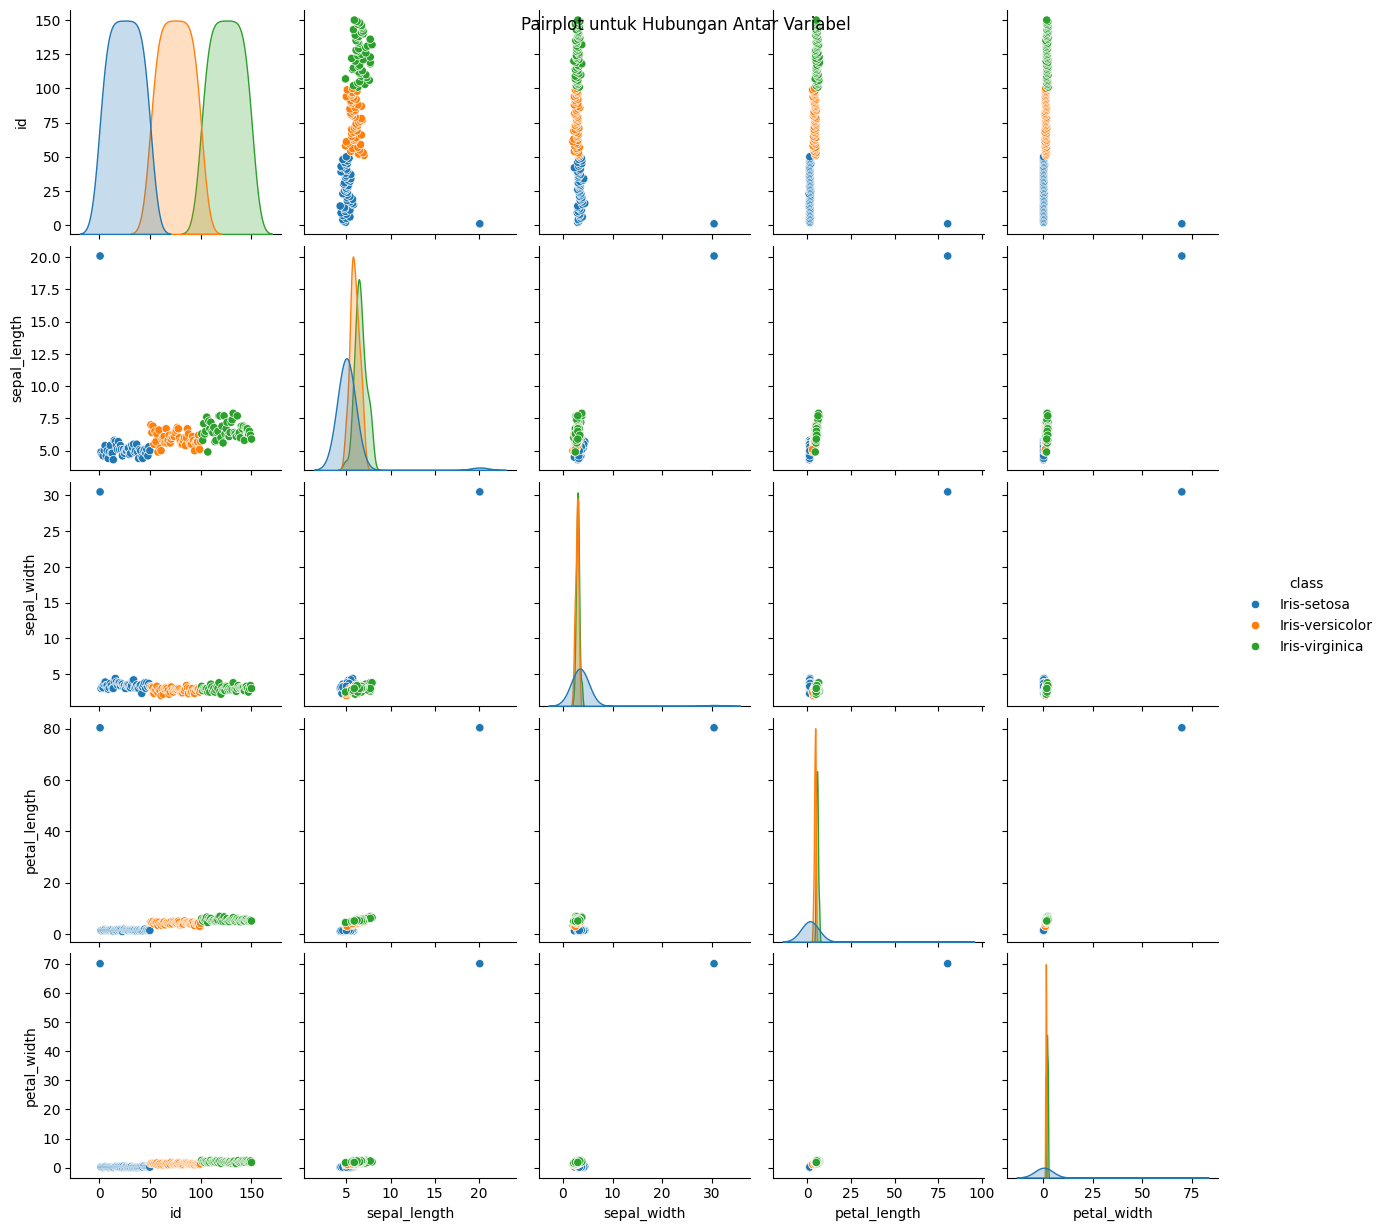

In [4]:
import psycopg2
import pymysql
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
try:
    # Koneksi PostgreSQL
    conn = psycopg2.connect(
        host=PG_HOST, port=PG_PORT, dbname=PG_NAME,
        user=PG_USER, password=PG_PASS, sslmode="require"
    )
    cur = conn.cursor()

    # Ambil data dari PostgreSQL
    cur.execute("SELECT * FROM sepal;")
    pg_rows = cur.fetchall()
    pg_columns = [desc[0] for desc in cur.description]
    pg_df = pd.DataFrame(pg_rows, columns=pg_columns)

    # Koneksi MySQL
    mysql_conn = pymysql.connect(
        host=DB_HOST, port=DB_PORT, user=DB_USER,
        password=DB_PASS, database=DB_NAME,
        cursorclass=pymysql.cursors.DictCursor
    )
    mysql_cur = mysql_conn.cursor()

    # Ambil data dari MySQL
    mysql_cur.execute("SELECT * FROM petal;")
    mysql_rows = mysql_cur.fetchall()
    mysql_df = pd.DataFrame(mysql_rows)

    # Menggabungkan kedua tabel berdasarkan ID
    combined_df = pd.merge(pg_df, mysql_df, on=["id", "class"], how="inner")

    # Mengatur urutan kolom
    ordered_columns = ["id", "class", "sepal_length", "sepal_width", "petal_length", "petal_width"]
    combined_df = combined_df[ordered_columns]

    # Statistik Deskriptif
    print("\n=== Descriptive Statistics ===")
    print(combined_df.describe())

    # Visualisasi Data
    plt.figure(figsize=(15, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(combined_df["sepal_length"], kde=True, bins=20)
    plt.title("Histogram Distribusi Sepal Length")

    plt.subplot(1, 2, 2)
    sns.histplot(combined_df["petal_length"], kde=True, bins=20)
    plt.title("Histogram Distribusi Petal Length")

    plt.show()

    # Boxplot untuk Outlier Detection
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=combined_df[["sepal_length", "sepal_width", "petal_length", "petal_width"]])
    plt.title("Boxplot Fitur")
    plt.show()

    # Pairplot untuk Hubungan Antar Variabel
    sns.pairplot(combined_df, hue="class", diag_kind="kde")
    plt.suptitle("Pairplot untuk Hubungan Antar Variabel")
    plt.show()

except Exception as e:
    print("Error:", e)

finally:
    # Menutup koneksi
    if cur:
        cur.close()
    if conn:
        conn.close()

### Identifikasi Oulier menggunakan metode KNN

K-Nearest Neighbors (KNN) adalah algoritma berbasis kedekatan (proximity-based) yang digunakan dalam klasifikasi, regresi, dan deteksi outlier. Dalam konteks outlier detection, KNN menghitung jarak antara setiap titik data dan k tetangga terdekatnya. Jika suatu titik jauh dari tetangga-tetangganya, maka titik tersebut dianggap sebagai outlier.



#### Cara kerja KNN dalam deteksi Outlier

1. Menghitung jarak

Untuk setiap data dalam dataset, KNN menghitung jaraknya terhadap semua titik lain.
Umumnya menggunakan Euclidean Distance dengan menjumlahkan selisih dari setiap fitur antar titiknya:

$d(A, B) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$

Pada kasus ini, fitur yang digunakan:
* Sepal Length
* Sepal Width
* Petal Length
* Petal Width

2. Mencari k Tetangga Terdekat
Untuk setiap titik data,
* cari k tetangga terdekat (misalnya k = 3).
* Urutkan data berdasarkan distance dan ambil 3 tetangga terdekat.

In [5]:
import psycopg2
import pymysql
import pandas as pd
import numpy as np
from tabulate import tabulate

# Fungsi untuk menghitung Euclidean Distance
def euclidean_distance(row1, row2):
    return np.sqrt(
        (row1["sepal_length"] - row2["sepal_length"])**2 +
        (row1["sepal_width"] - row2["sepal_width"])**2 +
        (row1["petal_length"] - row2["petal_length"])**2 +
        (row1["petal_width"] - row2["petal_width"])**2
    )

try:
    # Koneksi ke PostgreSQL
    conn = psycopg2.connect(
        host=PG_HOST, port=PG_PORT, dbname=PG_NAME,
        user=PG_USER, password=PG_PASS, sslmode="require"
    )
    cur = conn.cursor()

    # Ambil data dari PostgreSQL
    cur.execute("SELECT * FROM sepal;")
    pg_rows = cur.fetchall()
    pg_columns = [desc[0] for desc in cur.description]
    pg_df = pd.DataFrame(pg_rows, columns=pg_columns)

    # Koneksi ke MySQL
    mysql_conn = pymysql.connect(
        host=DB_HOST, port=DB_PORT, user=DB_USER,
        password=DB_PASS, database=DB_NAME,
        cursorclass=pymysql.cursors.DictCursor
    )
    mysql_cur = mysql_conn.cursor()

    # Ambil data dari MySQL
    mysql_cur.execute("SELECT * FROM petal ORDER BY id ASC;")
    mysql_rows = mysql_cur.fetchall()
    mysql_df = pd.DataFrame(mysql_rows)

    # Menggabungkan kedua tabel berdasarkan ID
    combined_df = pd.merge(pg_df, mysql_df, on=["id","class"], how="inner")

    # Mengatur urutan kolom agar class berada di sebelah ID
    ordered_columns = ["id", "class", "sepal_length", "sepal_width", "petal_length", "petal_width"]
    combined_df = combined_df[ordered_columns]

    # Menyimpan hasil tetangga terdekat
    neighbor_1_id, neighbor_1_dist = [], []
    neighbor_2_id, neighbor_2_dist = [], []
    neighbor_3_id, neighbor_3_dist = [], []

    # Menentukan tetangga terdekat untuk setiap data
    for i, row in combined_df.iterrows():
        # Buat DataFrame baru untuk perhitungan jarak
        temp_df = combined_df.copy()
        temp_df["distance"] = temp_df.apply(lambda r: euclidean_distance(r, row), axis=1)

        # Urutkan berdasarkan jarak dan ambil 3 tetangga terdekat (hindari diri sendiri)
        neighbors = temp_df.sort_values(by="distance").iloc[1:4]  # Skip indeks pertama karena itu dirinya sendiri

        # Simpan ID dan jarak tetangga
        neighbor_1_id.append(neighbors.iloc[0]["id"])
        neighbor_1_dist.append(neighbors.iloc[0]["distance"])
        neighbor_2_id.append(neighbors.iloc[1]["id"])
        neighbor_2_dist.append(neighbors.iloc[1]["distance"])
        neighbor_3_id.append(neighbors.iloc[2]["id"])
        neighbor_3_dist.append(neighbors.iloc[2]["distance"])

    # Tambahkan kolom tetangga ke dataframe utama
    combined_df["neighbor_1_id"] = neighbor_1_id
    combined_df["neighbor_1_dist"] = neighbor_1_dist
    combined_df["neighbor_2_id"] = neighbor_2_id
    combined_df["neighbor_2_dist"] = neighbor_2_dist
    combined_df["neighbor_3_id"] = neighbor_3_id
    combined_df["neighbor_3_dist"] = neighbor_3_dist

    # 🔥 Urutkan berdasarkan jarak terdekat ke neighbor_1
    combined_df = combined_df.sort_values(by="neighbor_1_dist").reset_index(drop=True)

    # Menampilkan hasil dalam format tabel
    print(tabulate(combined_df, headers="keys", tablefmt="psql", showindex=False))

except Exception as e:
    print("Error:", e)

finally:
    # Menutup koneksi database
    if cur:
        cur.close()
    if conn:
        conn.close()
    if mysql_cur:
        mysql_cur.close()
    if mysql_conn:
        mysql_conn.close()


+------+-----------------+----------------+---------------+----------------+---------------+-----------------+-------------------+-----------------+-------------------+-----------------+-------------------+
|   id | class           |   sepal_length |   sepal_width |   petal_length |   petal_width |   neighbor_1_id |   neighbor_1_dist |   neighbor_2_id |   neighbor_2_dist |   neighbor_3_id |   neighbor_3_dist |
|------+-----------------+----------------+---------------+----------------+---------------+-----------------+-------------------+-----------------+-------------------+-----------------+-------------------|
|   10 | Iris-setosa     |            4.9 |           3.1 |            1.5 |           0.1 |              35 |          0        |              38 |          0        |               2 |          0.173205 |
|   35 | Iris-setosa     |            4.9 |           3.1 |            1.5 |           0.1 |              35 |          0        |              38 |          0        |    

3. Menghitung Rata-rata Jarak ke k Tetangga Terdekat
Untuk setiap titik

* hitung rata-rata jarak ke 3 tetangga terdekat:

$
R = \frac{d_1 + d_2 + d_3}{3}
$

* Semakin besar nilai rata-rata distance, semakin besar kemungkinan titik tersebut adalah outlier.


In [6]:
import psycopg2
import pymysql
import pandas as pd
import numpy as np
from tabulate import tabulate

# Fungsi untuk menghitung Euclidean Distance
def euclidean_distance(row1, row2):
    return np.sqrt(
        (row1["sepal_length"] - row2["sepal_length"])**2 +
        (row1["sepal_width"] - row2["sepal_width"])**2 +
        (row1["petal_length"] - row2["petal_length"])**2 +
        (row1["petal_width"] - row2["petal_width"])**2
    )

try:
    # Koneksi ke PostgreSQL
    conn = psycopg2.connect(
        host=PG_HOST, port=PG_PORT, dbname=PG_NAME,
        user=PG_USER, password=PG_PASS, sslmode="require"
    )
    cur = conn.cursor()

    # Ambil data dari PostgreSQL
    cur.execute("SELECT * FROM sepal;")
    pg_rows = cur.fetchall()
    pg_columns = [desc[0] for desc in cur.description]
    pg_df = pd.DataFrame(pg_rows, columns=pg_columns)

    # Koneksi ke MySQL
    mysql_conn = pymysql.connect(
        host=DB_HOST, port=DB_PORT, user=DB_USER,
        password=DB_PASS, database=DB_NAME,
        cursorclass=pymysql.cursors.DictCursor
    )
    mysql_cur = mysql_conn.cursor()

    # Ambil data dari MySQL
    mysql_cur.execute("SELECT * FROM petal ORDER BY id ASC;")
    mysql_rows = mysql_cur.fetchall()
    mysql_df = pd.DataFrame(mysql_rows)

    # Menggabungkan kedua tabel berdasarkan ID
    combined_df = pd.merge(pg_df, mysql_df, on=["id","class"], how="inner")

    # Mengatur urutan kolom agar class berada di sebelah ID
    ordered_columns = ["id", "class", "sepal_length", "sepal_width", "petal_length", "petal_width"]
    combined_df = combined_df[ordered_columns]

    # Menyimpan hasil tetangga terdekat
    neighbor_1_id, neighbor_1_dist = [], []
    neighbor_2_id, neighbor_2_dist = [], []
    neighbor_3_id, neighbor_3_dist = [], []
    avg_distances = []

    # Menentukan tetangga terdekat untuk setiap data
    for i, row in combined_df.iterrows():
        # Buat DataFrame baru untuk perhitungan jarak
        temp_df = combined_df.copy()
        temp_df["distance"] = temp_df.apply(lambda r: euclidean_distance(r, row), axis=1)

        # Urutkan berdasarkan jarak dan ambil 3 tetangga terdekat (hindari diri sendiri)
        neighbors = temp_df.sort_values(by="distance").iloc[1:4]  # Skip indeks pertama karena itu dirinya sendiri

        # Simpan ID dan jarak tetangga
        neighbor_1_id.append(neighbors.iloc[0]["id"])
        neighbor_1_dist.append(neighbors.iloc[0]["distance"])
        neighbor_2_id.append(neighbors.iloc[1]["id"])
        neighbor_2_dist.append(neighbors.iloc[1]["distance"])
        neighbor_3_id.append(neighbors.iloc[2]["id"])
        neighbor_3_dist.append(neighbors.iloc[2]["distance"])

        # Hitung rata-rata distance
        avg_distance = (neighbors.iloc[0]["distance"] + neighbors.iloc[1]["distance"] + neighbors.iloc[2]["distance"]) / 3
        avg_distances.append(avg_distance)

    # Tambahkan kolom tetangga ke dataframe utama
    combined_df["neighbor_1_id"] = neighbor_1_id
    combined_df["neighbor_1_dist"] = neighbor_1_dist
    combined_df["neighbor_2_id"] = neighbor_2_id
    combined_df["neighbor_2_dist"] = neighbor_2_dist
    combined_df["neighbor_3_id"] = neighbor_3_id
    combined_df["neighbor_3_dist"] = neighbor_3_dist
    combined_df["avg_distance"] = avg_distances  # 🔥 Kolom baru untuk rata-rata distance

    # 🔥 Urutkan berdasarkan rata-rata jarak ke tetangga terdekat
    combined_df = combined_df.sort_values(by="avg_distance").reset_index(drop=True)

    # Menampilkan hasil dalam format tabel
    print(tabulate(combined_df, headers="keys", tablefmt="psql", showindex=False))

except Exception as e:
    print("Error:", e)

finally:
    # Menutup koneksi database
    if cur:
        cur.close()
    if conn:
        conn.close()
    if mysql_cur:
        mysql_cur.close()
    if mysql_conn:
        mysql_conn.close()


+------+-----------------+----------------+---------------+----------------+---------------+-----------------+-------------------+-----------------+-------------------+-----------------+-------------------+----------------+
|   id | class           |   sepal_length |   sepal_width |   petal_length |   petal_width |   neighbor_1_id |   neighbor_1_dist |   neighbor_2_id |   neighbor_2_dist |   neighbor_3_id |   neighbor_3_dist |   avg_distance |
|------+-----------------+----------------+---------------+----------------+---------------+-----------------+-------------------+-----------------+-------------------+-----------------+-------------------+----------------|
|   10 | Iris-setosa     |            4.9 |           3.1 |            1.5 |           0.1 |              35 |          0        |              38 |          0        |               2 |          0.173205 |       0.057735 |
|   35 | Iris-setosa     |            4.9 |           3.1 |            1.5 |           0.1 |            

4. Menentukan Outlier

* Gunakan threshold berdasarkan nilai rata-rata distance dari semua titik.

* Outlier adalah data yang memiliki rata-rata jarak lebih besar dari threshold tertentu (misalnya di atas Q3 + 1.5 * IQR dalam boxplot).


In [7]:
import psycopg2
import pymysql
import pandas as pd
import numpy as np
from tabulate import tabulate

# Fungsi untuk menghitung Euclidean Distance
def euclidean_distance(row1, row2):
    return np.sqrt(
        (row1["sepal_length"] - row2["sepal_length"])**2 +
        (row1["sepal_width"] - row2["sepal_width"])**2 +
        (row1["petal_length"] - row2["petal_length"])**2 +
        (row1["petal_width"] - row2["petal_width"])**2
    )

try:
    # Koneksi ke PostgreSQL
    conn = psycopg2.connect(
        host=PG_HOST, port=PG_PORT, dbname=PG_NAME,
        user=PG_USER, password=PG_PASS, sslmode="require"
    )
    cur = conn.cursor()

    # Ambil data dari PostgreSQL
    cur.execute("SELECT * FROM sepal;")
    pg_rows = cur.fetchall()
    pg_columns = [desc[0] for desc in cur.description]
    pg_df = pd.DataFrame(pg_rows, columns=pg_columns)

    # Koneksi ke MySQL
    mysql_conn = pymysql.connect(
        host=DB_HOST, port=DB_PORT, user=DB_USER,
        password=DB_PASS, database=DB_NAME,
        cursorclass=pymysql.cursors.DictCursor
    )
    mysql_cur = mysql_conn.cursor()

    # Ambil data dari MySQL
    mysql_cur.execute("SELECT * FROM petal ORDER BY id ASC;")
    mysql_rows = mysql_cur.fetchall()
    mysql_df = pd.DataFrame(mysql_rows)

    # Menggabungkan kedua tabel berdasarkan ID
    combined_df = pd.merge(pg_df, mysql_df, on=["id","class"], how="inner")

    # Mengatur urutan kolom agar class berada di sebelah ID
    ordered_columns = ["id", "class", "sepal_length", "sepal_width", "petal_length", "petal_width"]
    combined_df = combined_df[ordered_columns]

    # Menyimpan hasil tetangga terdekat
    avg_distances = []

    # Menentukan tetangga terdekat untuk setiap data
    for i, row in combined_df.iterrows():
        # Buat DataFrame baru untuk perhitungan jarak
        temp_df = combined_df.copy()
        temp_df["distance"] = temp_df.apply(lambda r: euclidean_distance(r, row), axis=1)

        # Urutkan berdasarkan jarak dan ambil 3 tetangga terdekat (hindari diri sendiri)
        neighbors = temp_df.sort_values(by="distance").iloc[1:4]  # Skip indeks pertama karena itu dirinya sendiri

        # Hitung rata-rata distance
        avg_distance = (neighbors.iloc[0]["distance"] + neighbors.iloc[1]["distance"] + neighbors.iloc[2]["distance"]) / 3
        avg_distances.append(avg_distance)

    # Tambahkan kolom rata-rata jarak ke dataframe utama
    combined_df["avg_distance"] = avg_distances

    # 🔥 Mendeteksi Outlier berdasarkan IQR
    Q1 = np.percentile(combined_df["avg_distance"], 25)  # Kuartil 1 (Q1)
    Q3 = np.percentile(combined_df["avg_distance"], 75)  # Kuartil 3 (Q3)
    IQR = Q3 - Q1  # Interquartile Range (IQR)
    threshold = Q3 + 1.5 * IQR  # Batas outlier

    # Buat kolom baru untuk menandai outlier (True/False)
    combined_df["outlier"] = combined_df["avg_distance"] > threshold

    # 🔥 Hapus kolom tetangga agar tabel lebih bersih
    combined_df.drop(columns=["neighbor_1_id", "neighbor_2_id", "neighbor_3_id"], errors="ignore", inplace=True)

    # 🔥 Urutkan berdasarkan rata-rata jarak ke tetangga terdekat
    combined_df = combined_df.sort_values(by="avg_distance").reset_index(drop=True)

    # Menampilkan hasil dalam format tabel
    print(tabulate(combined_df, headers="keys", tablefmt="psql", showindex=False))

except Exception as e:
    print("Error:", e)

finally:
    # Menutup koneksi database
    if cur:
        cur.close()
    if conn:
        conn.close()
    if mysql_cur:
        mysql_cur.close()
    if mysql_conn:
        mysql_conn.close()


+------+-----------------+----------------+---------------+----------------+---------------+----------------+-----------+
|   id | class           |   sepal_length |   sepal_width |   petal_length |   petal_width |   avg_distance | outlier   |
|------+-----------------+----------------+---------------+----------------+---------------+----------------+-----------|
|   10 | Iris-setosa     |            4.9 |           3.1 |            1.5 |           0.1 |       0.057735 | False     |
|   35 | Iris-setosa     |            4.9 |           3.1 |            1.5 |           0.1 |       0.057735 | False     |
|   38 | Iris-setosa     |            4.9 |           3.1 |            1.5 |           0.1 |       0.057735 | False     |
|   40 | Iris-setosa     |            5.1 |           3.4 |            1.5 |           0.2 |       0.127614 | False     |
|    8 | Iris-setosa     |            5   |           3.4 |            1.5 |           0.2 |       0.14714  | False     |
|   29 | Iris-setosa    

In [8]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=3, contamination=0.1)
y_pred = clf.fit_predict(combined_df[['petal_length', 'petal_width', 'sepal_length', 'sepal_width']])

# Instead of comparing against ground_truth (which has different size),
# evaluate using the model's inbuilt outlier prediction
outlier_index = np.where(y_pred == -1) # Outlier are labeled -1 by LOF

# Print outliers
print("Data yang diduga outlier (menggunakan LocalOutlierFactor):")
print(combined_df.iloc[outlier_index])
print (y_pred)

Data yang diduga outlier (menggunakan LocalOutlierFactor):
      id            class  sepal_length  sepal_width  petal_length  \
73    32      Iris-setosa           5.4          3.4           1.5   
86    21      Iris-setosa           5.4          3.4           1.7   
108   25      Iris-setosa           4.8          3.4           1.9   
116   45      Iris-setosa           5.1          3.8           1.9   
128   65  Iris-versicolor           5.6          2.9           3.6   
129   60  Iris-versicolor           5.2          2.7           3.9   
133   23      Iris-setosa           4.6          3.6           1.0   
137  115   Iris-virginica           5.8          2.8           5.1   
139   63  Iris-versicolor           6.0          2.2           4.0   
140  135   Iris-virginica           6.1          2.6           5.6   
142  109   Iris-virginica           6.7          2.5           5.8   
144  110   Iris-virginica           7.2          3.6           6.1   
146   42      Iris-setosa      

In [9]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# Normalisasi nama kolom agar seragam
combined_df.columns = combined_df.columns.str.strip().str.lower()

# Pastikan hanya kolom numerik yang digunakan
numeric_cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
X = combined_df[numeric_cols].astype(float)

# Inisialisasi model LOF
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)  # Prediksi outlier (-1) atau inlier (1)

# Tambahkan hasil prediksi ke DataFrame dengan nilai 1 atau -1
combined_df["outlier"] = y_pred

# Urutkan berdasarkan ID
combined_df = combined_df.sort_values(by="id").reset_index(drop=True)

# Buat tabel hasil prediksi dengan indeksnya
hasil_prediksi_df = pd.DataFrame({
    "index": combined_df.index,
    "id": combined_df["id"],
    "outlier": combined_df["outlier"]  # Menampilkan -1 (outlier) atau 1 (inlier)
})

# Buat tabel khusus outlier (-1)
outlier_df = hasil_prediksi_df[hasil_prediksi_df["outlier"] == -1]

# Cetak hasil tabel prediksi
print("\n🔹 Tabel Hasil Prediksi LOF:")
print(hasil_prediksi_df.to_string(index=False))  # Menampilkan semua data

# Cetak tabel khusus outlier
print("\n🔹 Tabel Data Outlier:")
print(outlier_df.to_string(index=False))  # Menampilkan hanya outlier (-1)



🔹 Tabel Hasil Prediksi LOF:
 index  id  outlier
     0   1       -1
     1   2        1
     2   3        1
     3   4        1
     4   5        1
     5   6        1
     6   7        1
     7   8        1
     8   9        1
     9  10        1
    10  11        1
    11  12        1
    12  13        1
    13  14        1
    14  15       -1
    15  16       -1
    16  17        1
    17  18        1
    18  19        1
    19  20        1
    20  21        1
    21  22        1
    22  23        1
    23  24        1
    24  25        1
    25  26        1
    26  27        1
    27  28        1
    28  29        1
    29  30        1
    30  31        1
    31  32        1
    32  33        1
    33  34       -1
    34  35        1
    35  36        1
    36  37        1
    37  38        1
    38  39        1
    39  40        1
    40  41        1
    41  42       -1
    42  43        1
    43  44        1
    44  45        1
    45  46        1
    46  47        1
    47  48 